In [1]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import csv

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#for i in adata1.obs.keys():
#    print(i)

In [4]:
#adata1.obs['total_counts']

In [3]:
#fpath1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/analysis/adata/cell_prob_filter_0pt5/ti-cd_healthy-auto_processed_v001-labels_freeze_v003-old_samples-processed.h5ad"
#adata1=sc.read(fpath1)  

#fpath2="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/analysis/adata/cell_prob_filter_0pt5/ti-cd_healthy-auto_processed_v001-labels_freeze_v003-new_samples-processed.h5ad"
#adata2=sc.read(fpath2) 

fpath1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Discovery.h5ad"
adata1=sc.read(fpath1)  

fpath2="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Replication.h5ad"
adata2=sc.read(fpath2) 

In [3]:
#fpath3="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/analysis/adata/cell_prob_filter_0pt5/ti-cd_healthy-auto_processed_v001-labels_freeze_v003-all_samples-processed.h5ad"
#adata3=sc.read(fpath3) 
fpath3="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Full.h5ad"
adata3=sc.read(fpath3) 

In [13]:
adata_epi=adata3[adata3.obs['label__machine'].isin(['Enterocyte_middle_villus_1',
       'Enterocyte_middle_villus_2',
       'Enterocyte_precursor_crypt_OLFM4plus_KRT20plusplus',
       'Enterocyte_progenitor_crypt_OLFM4plusplus_KRT20plus_1',
       'Enterocyte_progenitor_crypt_OLFM4plusplus_KRT20plus_2',
       'Enterocyte_top_villus', 'Enterocytes_BEST4',
       'Fibroblast_slash_myofibroblasts', 'Goblet_cell_crypt_MKI67plus',
       'Goblet_cell_middle_villus', 'Goblet_cell_top_villus'])] #'Endocrine_cell', 'Endothelial_cell', 

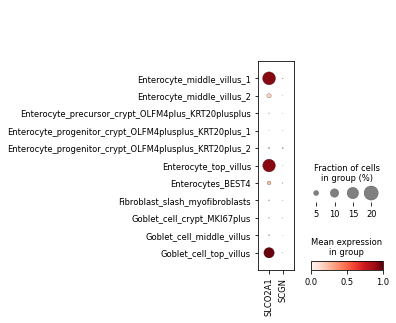

In [14]:
out=["SLCO2A1", "SCGN"]
sc.pl.dotplot(adata_epi, out, groupby='label__machine',
                  gene_symbols='gene_symbols', 
              dendrogram=False,
                  standard_scale='var', save="SLCO2A1_SCGN.png")

In [7]:
#for i in adata1.obs.keys():
#    print(i)

In [8]:
df1 = adata1.obs[['sanger_sample_id','disease_status']].drop_duplicates().reset_index(drop=True)
df = adata1.obs[['sanger_sample_id','disease_status', 'label__machine']]
df = df.groupby(['label__machine','sanger_sample_id']).size().reset_index(name='nr_cells')
df1=df1.merge(df, how='inner', on='sanger_sample_id')
df1.to_csv("/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/figures/data/cell_proportions_discovery.csv", sep=",", index=False) 

In [9]:
df2 = adata2.obs[['sanger_sample_id','disease_status']].drop_duplicates().reset_index(drop=True)
df = adata2.obs[['sanger_sample_id','disease_status', 'label__machine']]
df = df.groupby(['label__machine','sanger_sample_id']).size().reset_index(name='nr_cells')
df2=df2.merge(df, how='inner', on='sanger_sample_id')
df2.to_csv("/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/figures/data/cell_proportions_replication.csv", sep=",", index=False) 

In [10]:
df3 = adata3.obs[['sanger_sample_id','disease_status']].drop_duplicates().reset_index(drop=True)
df = adata3.obs[['sanger_sample_id','disease_status', 'label__machine']]
df = df.groupby(['label__machine','sanger_sample_id']).size().reset_index(name='nr_cells')
df3=df3.merge(df, how='inner', on='sanger_sample_id')
df3.to_csv("/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/figures/data/cell_proportions_full.csv", sep=",", index=False) 

In [97]:
#gplt = plt9.ggplot(df1, plt9.aes(x='cell_type', y='fraction_cells_condition', fill = 'disease_status'))  + plt9.ylab("Fraction of cells across samples within condition (%)")
#gplt = gplt + plt9.theme_bw() #+ plt9.scale_fill_manual(values=palette) 
#gplt = gplt + plt9.geom_errorbar(plt9.aes(x='cell_type', y='fraction_cells_condition', fill = 'disease_status'), ymin=np.log10(0), ymax=np.log10(2.4)) 
#gplt = gplt + plt9.coord_flip() #+ plt9.guides(colour=plt9.guide_legend(ncol=1, override_aes={"size": 15}, title_vjust = 1))
#gplt = gplt + plt9.theme(text=plt9.element_text(size=15))+ plt9.theme(axis_title_y = plt9.element_blank())
#gplt = gplt + plt9.labs(fill="Cell type") + plt9.scale_y_log10() #+ plt9.xlab("Fraction (%)")
#gplt

In [15]:
df11=adata1.obs[['sanger_sample_id', 'disease_status']].drop_duplicates()
df22=adata2.obs[['sanger_sample_id', 'disease_status']].drop_duplicates()
df33=adata3.obs[['sanger_sample_id', 'disease_status']].drop_duplicates()

In [16]:
df1 = adata1.obs[['sanger_sample_id', "disease_status"]].groupby(['sanger_sample_id']).size().reset_index(name='nr_cells')
df2 = adata2.obs[['sanger_sample_id', "disease_status"]].groupby(['sanger_sample_id']).size().reset_index(name='nr_cells')

df1=df1.join(df11.set_index('sanger_sample_id'), on='sanger_sample_id')
df2=df2.join(df22.set_index('sanger_sample_id'), on='sanger_sample_id')

In [20]:
result = pd.concat([df1,df2])
result

,sanger_sample_id,nr_cells,disease_status
0,5892STDY8039553,8236,cd
1,5892STDY8039649,4357,cd
2,5892STDY8039745,7647,cd
3,5892STDY8039841,3670,cd
4,5892STDY8356878,7939,cd
...,...,...,...
65,OTARscRNA11765498,2511,healthy
66,OTARscRNA12147503,8826,healthy
67,OTARscRNA12147505,3880,healthy
68,OTARscRNA12147507,5542,cd


In [21]:
result.groupby('disease_status').agg('mean')

,nr_cells
disease_status,
cd,5151.183673
healthy,2632.000000


In [18]:
v=adata1
df = v.obs[['sanger_sample_id', "disease_status"]]
df1 = df.groupby(['sanger_sample_id']).size().reset_index(name='nr_cells')
df=df.drop_duplicates()
df=df.join(df1.set_index('sanger_sample_id'), on='sanger_sample_id')
df.groupby('disease_status').agg('sum')

,nr_cells
disease_status,
cd,119711
healthy,67650


In [19]:
v=adata2
df = v.obs[['sanger_sample_id', "disease_status"]]
df1 = df.groupby(['sanger_sample_id']).size().reset_index(name='nr_cells')
df=df.drop_duplicates()
df=df.join(df1.set_index('sanger_sample_id'), on='sanger_sample_id')
df.groupby('disease_status').agg('sum')

,nr_cells
disease_status,
cd,132697
healthy,121854


In [20]:
v=adata3
df = v.obs[['sanger_sample_id', "disease_status"]]
df1 = df.groupby(['sanger_sample_id']).size().reset_index(name='nr_cells')
df=df.drop_duplicates()
df=df.join(df1.set_index('sanger_sample_id'), on='sanger_sample_id')
df.groupby('disease_status').agg('sum')

,nr_cells
disease_status,
cd,252408
healthy,189504


In [21]:
119+132

251

In [22]:
67+121

188